<a href="https://colab.research.google.com/github/bintangkw/pmobile/blob/master/Tubes_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Library

In [280]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


##2. Preprocessing

In [309]:
df = pd.read_excel('/content/drive/MyDrive/ANALITIK DATA 2/Modul 6/MODUL 6 - REGRESI LOGISTIK_BELI MOBIL (1).xlsx')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


##3. Data Understanding

In [282]:
df.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,38.872000,1.472000,0.464000,0.780000,221.872000,0.456000
std,72.312977,13.787239,0.892413,0.499703,0.746881,80.168144,0.499059
min,1.000000,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,63.250000,30.000000,1.000000,0.000000,0.000000,170.500000,0.000000
50%,125.500000,36.500000,2.000000,0.000000,1.000000,200.000000,0.000000
75%,187.750000,45.000000,2.000000,1.000000,1.000000,257.750000,1.000000
max,250.000000,164.000000,3.000000,1.000000,4.000000,490.000000,1.000000


In [283]:
df['Kelamin'].value_counts()

,count
Kelamin,
0,134
1,116


##4. Cleaning Data

In [284]:
df = df.drop(columns=['ID'])

In [285]:
df.isnull().sum()

,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [286]:
df.dropna()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,32,1,0,0,240,1
1,49,2,1,1,100,0
2,52,1,0,2,250,1
3,26,2,1,1,130,0
4,45,3,0,2,237,1
...,...,...,...,...,...,...
245,34,0,1,1,200,1
246,40,1,1,1,200,0
247,45,1,0,1,300,1
248,56,2,0,1,400,1


##5. Eksplorasi Data Analysis (EDA)

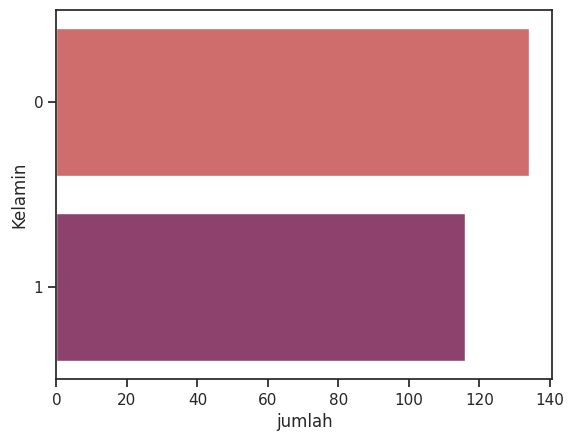

In [287]:
import warnings #menambahkan library warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='ticks') #mengatur tema visualisasi
sns.countplot(y='Kelamin', data=df, palette='flare')
plt.xlabel('jumlah')
plt.show()

In [288]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
df

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,32,1,0,0,240,1
1,49,2,1,1,100,0
2,52,1,0,2,250,1
3,26,2,1,1,130,0
4,45,3,0,2,237,1
...,...,...,...,...,...,...
245,34,0,1,1,200,1
246,40,1,1,1,200,0
247,45,1,0,1,300,1
248,56,2,0,1,400,1


In [289]:
import sklearn.model_selection as ms
x = df[['Usia','Status','Memiliki_Mobil','Penghasilan','Beli_Mobil']]
y = df['Kelamin']
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=30)

##6. Modeling (Regresi Logistik)

In [290]:
import sklearn.linear_model as lm
model = lm.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [291]:
model.coef_

array([[-2.00318342e-02,  3.13304235e-01,  9.17884202e-01,
        -4.37162051e-04, -2.80264843e+00]])

In [292]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0
 1]


In [293]:
X_test.head()

,Usia,Status,Memiliki_Mobil,Penghasilan,Beli_Mobil
228,34,2,1,215,0
238,24,0,0,150,0
35,47,2,1,240,0
122,43,2,2,178,0
155,39,1,1,289,1


In [294]:
y_test.head(1)

,Kelamin
228,0


In [295]:
import sklearn.metrics as met
cofusionmatrix = met.confusion_matrix(y_test, y_prediksi)
print(cofusionmatrix)

[[25 13]
 [10 27]]


In [296]:
score = model.score(X_test, y_test)
print(score)

0.6933333333333334


In [297]:
precesion = met.precision_score(y_test, y_prediksi)
print(precesion)

0.675


In [298]:
auc = met.roc_auc_score(y_test, y_prediksi)
print(auc)

0.6938122332859176


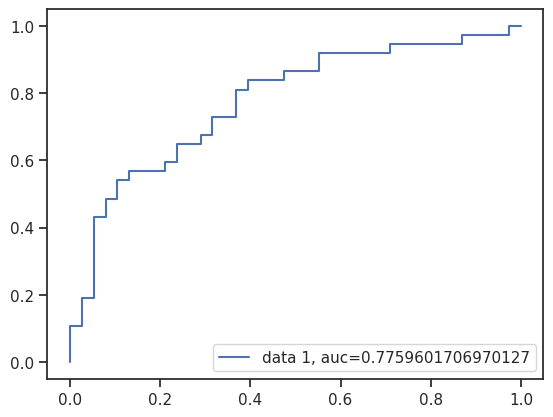

In [299]:
import matplotlib.pyplot as plt
y_pred_prob = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_prob)
auc = met.roc_auc_score(y_test, y_pred_prob)
plt.plot(fp, tp, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [300]:
testing1 = pd.DataFrame({
    'Usia': [20],
    'Status': [1],
    'Memiliki_Mobil': [0],
    'Penghasilan': [220],
    'Beli_Mobil' : [0]
})

testing1 = pd.DataFrame(testing1)
testing1

,Usia,Status,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,20,1,0,220,0


In [301]:
testing1 = testing1[df[['Usia','Status','Memiliki_Mobil','Penghasilan','Beli_Mobil']].columns]
pred_coba = model.predict(testing1)
print('Metode Pengiriman yang akan gunakan : ')
print(pred_coba)

Metode Pengiriman yang akan gunakan : 
[1]


In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [303]:
print("Regresi Logistik:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lr))

Regresi Logistik:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        38
           1       0.68      0.73      0.70        37

    accuracy                           0.69        75
   macro avg       0.69      0.69      0.69        75
weighted avg       0.69      0.69      0.69        75

AUC-ROC: 0.7759601706970127


In [304]:
accuracy = accuracy_score(y_test, y_prediksi)
print(f"Akurasi : {accuracy:.2f}")
precision = precision_score(y_test, y_prediksi)
print(f"Presisi : {precision:.2f}")
recall = recall_score(y_test, y_prediksi)
print(f"Recall  : {recall:.2f}")
f1 = f1_score(y_test, y_prediksi)
print(f"F1-Score: {f1:.2f}")
auc = met.roc_auc_score(y_test, y_prediksi)
print(f"AUC-ROC : {auc:.2f}")

Akurasi : 0.69
Presisi : 0.68
Recall  : 0.73
F1-Score: 0.70
AUC-ROC : 0.69


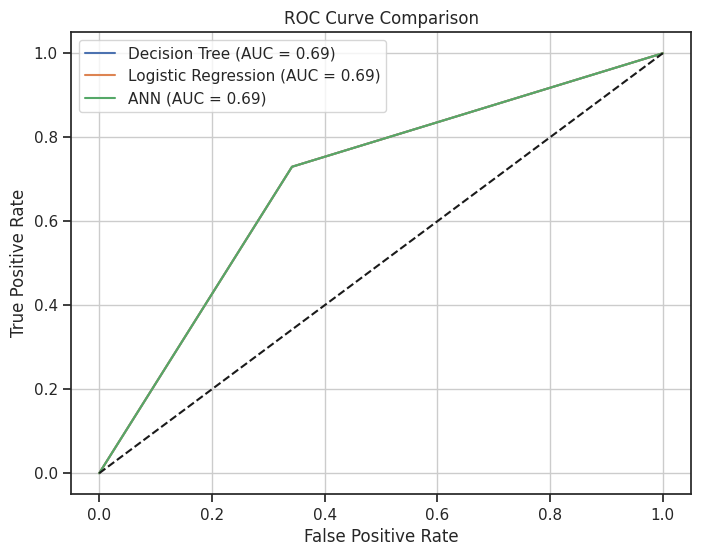

In [305]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prediksi)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prediksi)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prediksi)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prediksi)))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prediksi)))
plt.plot(fpr_ann, tpr_ann, label='ANN (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prediksi)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()